In [160]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200
sns.set_theme(style='white')

Data from https://jackblun.github.io/Globalinc/

In [161]:
data = pd.read_csv("data/GCIPrawdata.csv", header=2)
data = data.melt(
    id_vars=['Country', 'Year'],
    value_vars=[f'Decile {i} Income' for i in range(1, 11)],
    value_name='Income',
    var_name='Decile',
)
data.Decile = data.Decile.str.split(expand=True)[1].astype(int)
income = data.set_index(['Country', 'Decile', 'Year'])
income

Income
Country     Decile Year        
Afghanistan 1      1980     206
                   1981     212
                   1982     221
                   1983     238
                   1984     249
...                         ...
Zambia      10     2011    3983
                   2012    4123
                   2013    4268
                   2014    4387
                   2015    4534

[49020 rows x 1 columns]

In [162]:
def get_inequality(data):
    rich = data.xs(10, level='Decile').Income
    poor = data.xs( 1, level='Decile').Income
    return (rich / poor).to_frame('Inequality')

inequality = get_inequality(income)
inequality

Inequality
Country     Year            
Afghanistan 1980   17.194175
            1981   17.240566
            1982   17.257919
            1983   17.247899
            1984   17.232932
...                      ...
Zambia      2011  107.648649
            2012  108.500000
            2013  109.435897
            2014  109.675000
            2015  107.952381

[4902 rows x 1 columns]

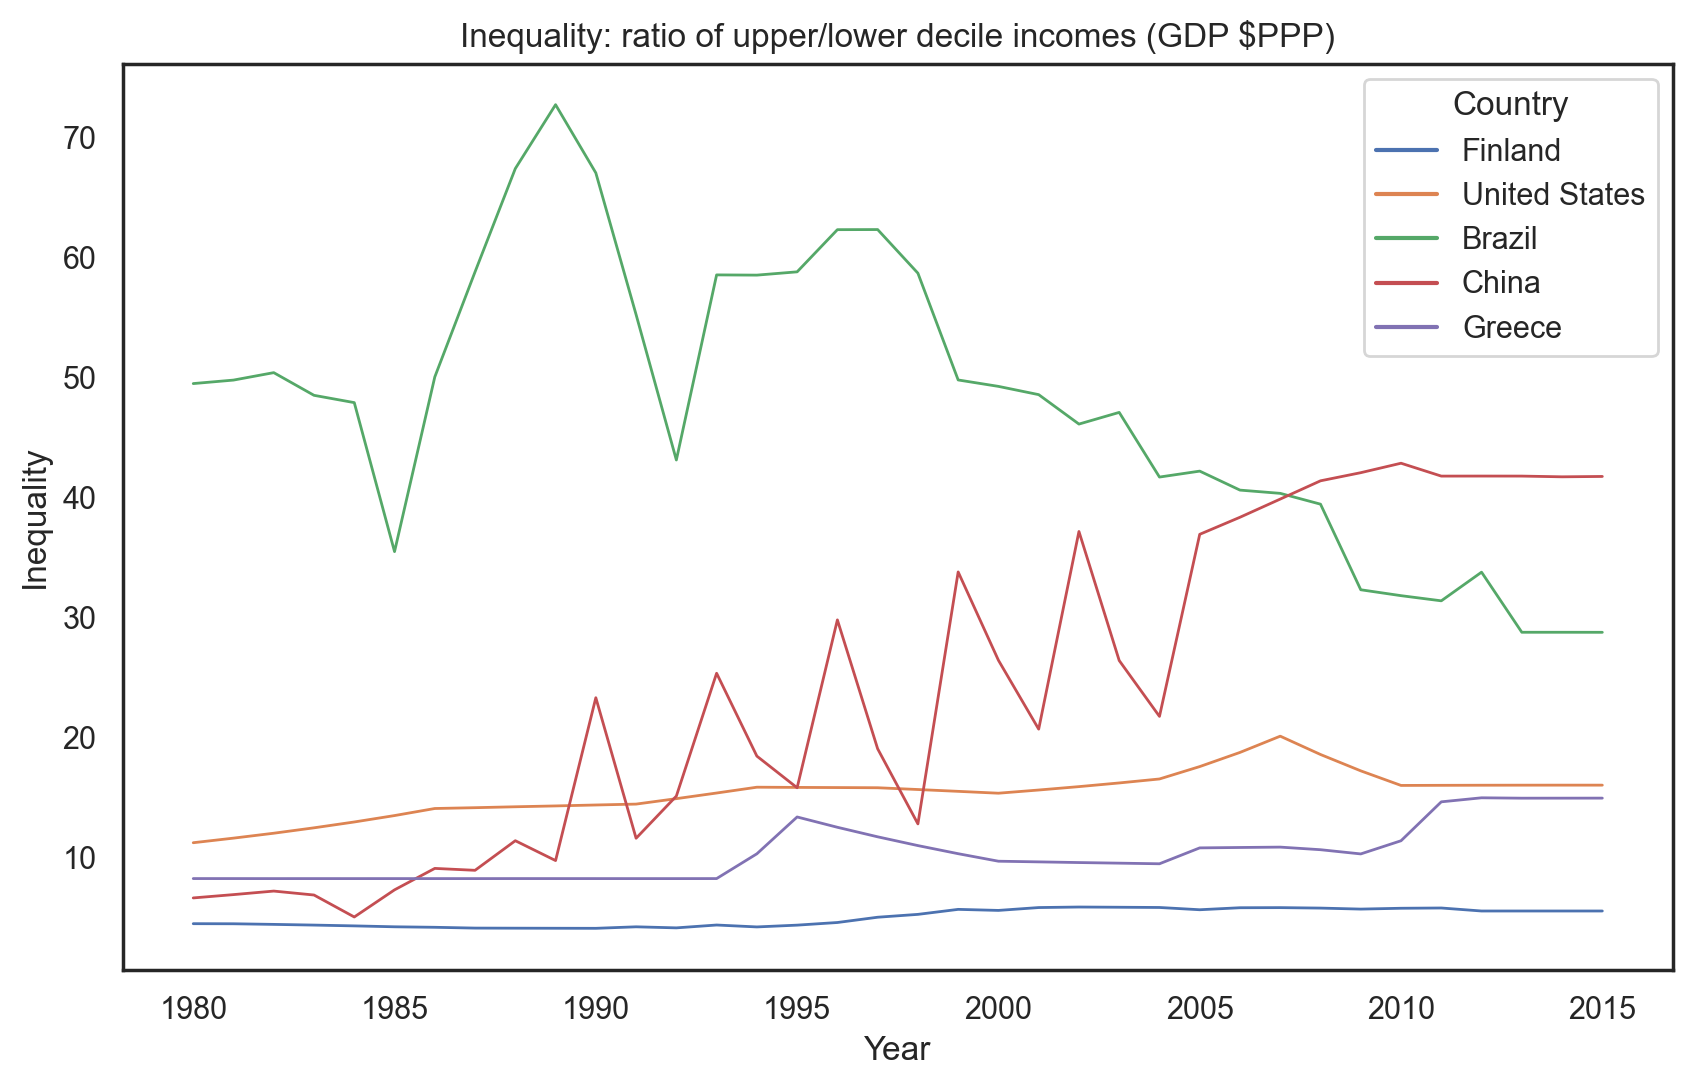

In [165]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Inequality: ratio of upper/lower decile incomes (GDP $PPP)')
_ = sns.lineplot(
    data=inequality.loc[pd.IndexSlice[['Finland', 'United States', 'Brazil', 'China', 'Greece']]].reset_index(),
    x='Year',
    y='Inequality',
    hue="Country",
    ax=ax,
    lw=1,
)